<b><font color="red" size="6">ch11. N차원 배열 다루기</font></b>
# 4절. 복사와 뷰
## 4.1 할당

In [1]:
# 스칼라 변수
a = 10
a
b = a
print('a와 b주소:', id(a), id(b))
b = 99
print('수정 후 a와 b주소:', id(a), id(b))

a와 b주소: 2100130873872 2100130873872
수정 후 a와 b주소: 2100130873872 2100130876720


In [2]:
# 배열
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
id(a)

2100215633968

In [4]:
b = a

In [5]:
a.shape, type(a), a.ndim, id(a)

((12,), numpy.ndarray, 1, 2100215633968)

In [6]:
b.shape, type(b), b.ndim, id(b)

((12,), numpy.ndarray, 1, 2100215633968)

In [7]:
a is b

True

In [8]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [9]:
all(a==b)

True

In [10]:
b.shape = (3, 4)

In [11]:
a.shape, type(a), a.ndim, id(a)

((3, 4), numpy.ndarray, 2, 2100215633968)

## 4.2 뷰(View): 얕은 복사

In [12]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
c = a.view()
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
c == a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [15]:
np.all(c == a)

True

In [16]:
c is a

False

In [17]:
c.shape = (2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [18]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
# 배열 c의 특정 요소만 변경(1행의 짝수번째 열 변경)
c[1, ::2] = -9
c

array([[ 0,  1,  2,  3,  4,  5],
       [-9,  7, -9,  9, -9, 11]])

In [20]:
# 슬라이싱이 될 때 뷰가 반환됨
a = np.array([[1, 85, 2015, 5000],
              [1, 102, 2015, 5500],
              [2, 45, 2016, 4900],])
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

In [21]:
X = a[:, : -1] # 독립변수를 슬라이싱해서 X대입: 슬라이싱될 때 뷰가 반환
X

array([[   1,   85, 2015],
       [   1,  102, 2015],
       [   2,   45, 2016]])

In [22]:
X[0:2, -1] = 1
X[-1, -1] = 2
X

array([[  1,  85,   1],
       [  1, 102,   1],
       [  2,  45,   2]])

In [23]:
a

array([[   1,   85,    1, 5000],
       [   1,  102,    1, 5500],
       [   2,   45,    2, 4900]])

## 4.3 깊은 복사

In [24]:
# 슬라이싱이 될 때 뷰가 반환됨
a = np.array([[1, 85, 2015, 5000],
              [1, 102, 2015, 5500],
              [2, 45, 2016, 4900],])
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

In [25]:
X = a[:, :-1] # 얕은 복사(View 생성)
X = a[:,:-1].copy() # 깊은 복사
X

array([[   1,   85, 2015],
       [   1,  102, 2015],
       [   2,   45, 2016]])

In [26]:
X[:, 0:-1] = 1
X[-1, -1] = 2
X

array([[   1,    1, 2015],
       [   1,    1, 2015],
       [   1,    1,    2]])

In [27]:
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

# 5절. 고급 인덱싱
## 5.1 인덱스 배열로 인덱싱

In [28]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [29]:
a [ [0, 5, 9] ]

array([ 0, 25, 81])

In [30]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0, 0, 5, 9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라감

array([ 0,  0, 25, 81])

In [31]:
# 인덱싱하기 위한 값을 배열로 만듦
j = np.array([[0, 1],
              [1, 5]])
a[j]

array([[ 0,  1],
       [ 1, 25]])

In [32]:
a[j] += 100
a

array([100, 101,   4,   9,  16, 125,  36,  49,  64,  81, 100, 121])

In [33]:
                #   R  G  B
palette = np.array([[0, 0, 0],       # black
                    [255, 0, 0],     # red
                    [0, 255, 0],     # green
                    [0, 0, 255],     # blue
                    [255, 255, 255]]) # white

In [34]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [35]:
image_data.shape

(10, 10, 3)

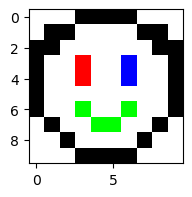

In [36]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(image_data)
plt.show()

In [37]:
# 나중에 학습할 이미지 데이터

In [38]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [39]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()

In [42]:
mnist[0][0].shape # 독립변수가 될 이미지들 60000

(60000, 28, 28)

In [43]:
mnist[0][1] # 종속변수

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
X = mnist[0][0]
Y = mnist[0][1]

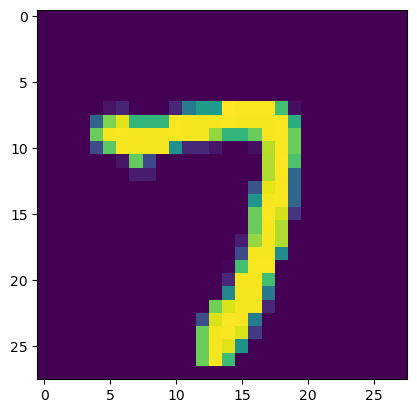

In [47]:
plt.imshow(X[57230])
plt.show()

In [48]:
Y[57217]

8

## 5.2 argmax: 최댓값이 있는인덱스

In [49]:
import numpy as np
data = np.sin(np.arange(20).reshape(5, 4))
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [50]:
ind = data.argmax(axis=0) # 각 열별 큰 값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [51]:
# 0열에서의 최댓값, 1열에서의 최댓값, 2열에서의 최댓값
data[ind[0], 0], data[ind[1], 1], data[ind[2], 2], data[ind[3], 3]

(0.9893582466233818,
 0.8414709848078965,
 0.9906073556948704,
 0.6569865987187891)

In [52]:
data.shape

(5, 4)

In [54]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [56]:
np.all(data_col_max == data.max(axis=0))

True

## 5.3 논리배열을 이용한 인덱싱

In [57]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [58]:
a[a%2==0] # 논리 배열을 이용한 인덱싱시 True 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [59]:
a[a>15]

array([16, 17, 18, 19])

# 6절. 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @, np.dot()
    * 역행렬 : np.linalg.inv(X)
    * 전치행렬 : X.T, X.transpose()
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    
## 6.1. 선형 연립방정식 풀기

In [63]:
a = np.array([[1,2],
              [3,4]])

In [64]:
# a의 역행렬 : a의역행렬@a => 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [65]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [66]:
np.eye(2) # 2행 2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [68]:
np.linalg.inv(a) @ a == np.eye(2)

array([[False, False],
       [ True, False]])

## 6.1 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2개

In [71]:
x = np.array([2,4]) # 독립변수
Y = np.array([40,60]) # 종속변수
X = np.dstack((x, np.ones(len(x)) ))
X

array([[[2., 1.],
        [4., 1.]]])

In [72]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

In [75]:
wb = np.linalg.inv(X) @ Y
wb 

array([[10., 20.]])

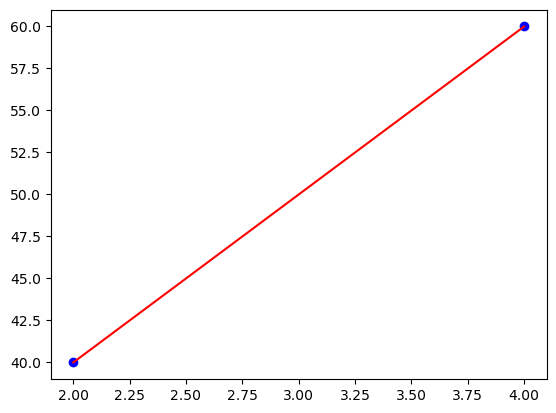

In [78]:
import matplotlib.pyplot as plt
plt.scatter(x, Y, c='b')
plt.plot(x, 10*x+20, color='r')
plt.show()